## SyriaTel Customer Churn Prediction

## 1. Introduction and Overview

### 1.1 Overview

SyriaTel is one of the major telecommunications company in Syria, known for providing mobile and internet services across the country. It was founded in 2000 and is one of the two main mobile network operators in Syria, the other being MTN Syria. SyriaTel provides voice, data, and messaging services, including prepaid and postpaid mobile plans. The company has faced numerous challenges due to the Syrian civil war, including infrastructure damage, economic sanctions, and political instability. These factors have impacted its operations and financial performance over the years.

Customer churn is where customers stop using a company's product or service over a given period of time. It is a critical metric for businesses as it directly impacts profitability and growth. The project's goal is to build a machine learning model to predict whether a customer will ("soon") stop doing business with SyriaTel. By analyzing customer data, the model will enable SyriaTel to pinpoint customers most likely to discontinue their service, enabling targeted retention strategies.

### 1.2 CRISP-DM Methodology

This project will follow the ***CRoss-Industry Standard Process for Data Mining (CRISP-DM)*** methodology to organize and structure the data science process. The process is iterative and consists of six main phases:

 1. **Business Understanding**
 2. **Data Understanding**
 3. **Data Preparation**
 4. **Modeling**
 5. **Evaluation**
 6. **Deployment** *(the model will not be deployed in this project)*

The methodology's iterative approach enables a return to previous steps as needed, based on the discovery of new information or the encounter of challenges. This flexibility contributes to the creation of a robust solution that aligns with the needs of the business.

## 2. Business Understanding

### 2.1 Business Problem

SyriaTel has been experiencing customer churn and to get ahead of the situation the company seeks to predict whether their customers will soon leave the company and factors leading to it. Key stakeholders in this project will be:
 - **Customer Relationship Management (CRM) Team:** to use the churn prediction insights to design retention strategies.
 - **Marketing Team:** to design and execute personalized campaigns based on the predicted churn risk and identified churn factors.
 - **Customer Service/Support Team** to proactively reach out to at-risk customers, improving service quality and addressing issues that may lead to churn.

### 2.2 Objectives

 - Develop a Churn Prediction Model: Build a Logistic Regression model to predict the likelihood of customers leaving SyriaTel, enabling the company to identify at-risk customers before they churn.

 - Identify Key Churn Drivers: Analyze the model's outputs to determine the most significant factors contributing to customer churn.

 - Enable Proactive Retention Strategies:Use the insights from the model to design targeted interventions aimed at retaining at-risk customers.

## 3. Data Understanding

This section will explore the data to become familiar with its characteristics as well as identify data quality issues and gather initial insights to guide further analysis.

In [1]:
#importing the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_validate,cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Loading and previewing the telecom dataset
df = pd.read_csv('telecom.churn.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Now, I will explore the data to gain insights about the data.

In [3]:
# Previewing the top of our dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Previewing the bottom of our dataset
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
# Checking the dimensions of the data
df.shape

(3333, 21)

 This output shows:
 
 - Number of Rows (Observations): There are 3333 rows in the DataFrame.
 - Number of Columns (Variables): There are 21 columns (or variables) in the DataFrame.

In [6]:
# Checking on the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Checking the structure of the dataset to identify anomalies
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
#Checking columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

From the output these are the columns in our data and their descriptions based on a review of our data and information from our data source:

 - **state:** The state of the customer.
 - **account length:** The length of the account in days or months.
 - **area code:** The area code of the customer's phone number.
 - **phone number:** The phone number of the customer.
 - **international plan:** Whether the customer has an international plan or not.
 - **voice mail plan:** Whether the customer has a voicemail plan or not.
 - **number vmail messages:** The number of voicemail messages the customer has.
 - **total day minutes:** Total minutes of day calls.
 - **total day calls:** Total number of day calls.
 - **total day charge:** Total charge for the day calls.
 - **total eve minutes:** Total minutes of evening calls.
 - **total eve calls:** Total number of evening calls.
 - **total eve charge:** Total charge for the evening calls.
 - **total night minutes:** Total minutes of night calls.
 - **total night calls:** Total number of night calls.
 - **total night charge:** Total charge for the night calls.
 - **total intl minutes:** Total minutes of international calls.
 - **total intl calls:** Total number of international calls.
 - **total intl charge:** Total charge for the international calls.
 - **customer service calls:** Number of times the customer called customer service.
 - **churn:** Whether the customer churned or not (True/False).

## 4. Data Preparation

Here I will clean and preprocess the data, including selecting relevant features, handling missing values, and transforming data into the desired format for modeling.

#### Check for any missing values.

In [9]:
# Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

From the output I can conclude there are no missing values within this dataset.

#### Check for any duplicates.

In [10]:
# Checking for duplicates
df.duplicated().sum()

0

From the output I can conclude there are no duplicate values within this dataset.

In [11]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


There are 15 **numerical variables** in the dataset

 - The numerical variables are : [*'account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls'*]


There are 6 **categorical variables** in the dataset

 - The categorical variables are : [*'state', 'area code', 'phone number', 'international plan', 'voice mail plan', 'churn'*]

I'll drop the `phone number` column as it’s not useful for modeling.

In [12]:
# Dropping the 'phone number' column
df = df.drop(columns=['phone number'])

# Verifying that the column has been dropped
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 4.1 Churn distribution

The target variable is `churn`. It is a binary variable which I'll be solving a classification problem for. I'll take a look at the distribution of `churn`.

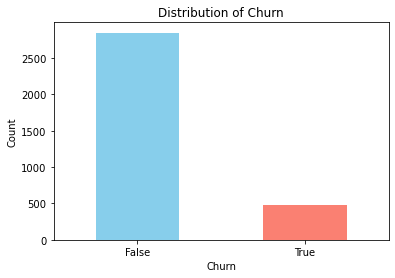

In [13]:
# Plotting the distribution of the 'churn' column
plt.figure(figsize=(6, 4))
df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.show()

### 4.2 Numerical variables distribution

Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution.

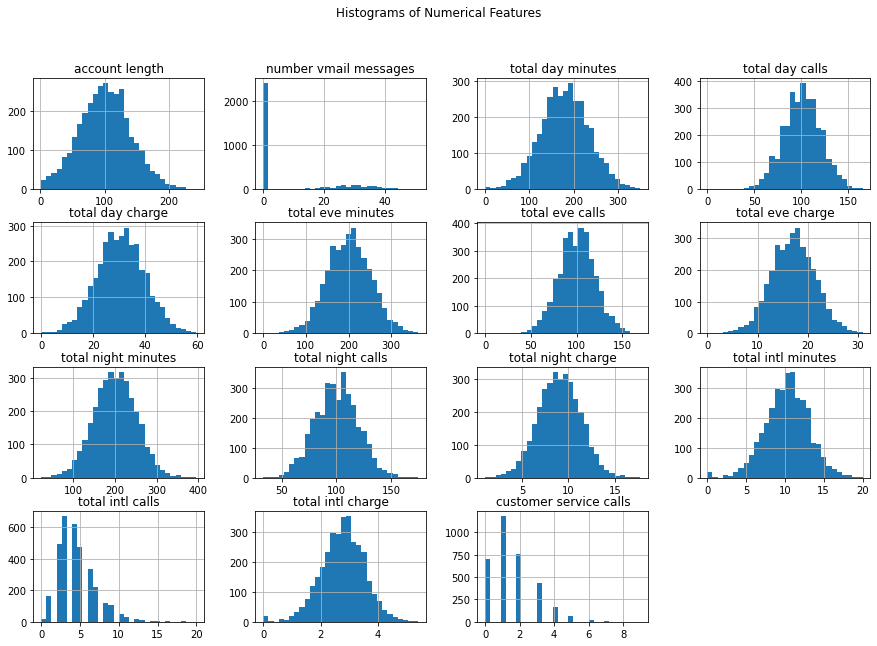

In [14]:
# Plotting distributions of numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                       'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                       'total night minutes', 'total night calls', 'total night charge', 
                       'total intl minutes', 'total intl calls', 'total intl charge', 
                       'customer service calls']

df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

### 4.3 Combining features

By combining these features, I can create a more compact and potentially more informative feature set for my classification model, which could improve its ability to predict churn.

In [15]:
# Combine total minutes for day, evening, and night
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

# Combine the number of calls made during the day, evening, and night
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

# Combine total charges for day, evening, night, and international calls
df['total_charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

# Interaction between international plan and total international minutes
df['intl_plan_usage'] = (df['international plan'] == 'yes').astype(int) * df['total intl minutes']

# Interaction between voicemail plan and number of voicemail messages
df['vmail_plan_usage'] = (df['voice mail plan'] == 'yes').astype(int) * df['number vmail messages']

# Average call duration
df['avg_call_duration'] = df['total_minutes'] / df['total_calls']

# Dropping the original individual columns that were combined
df = df.drop(columns=[
    'total day minutes', 'total eve minutes', 'total night minutes',
    'total day calls', 'total eve calls', 'total night calls',
    'total day charge', 'total eve charge', 'total night charge', 'total intl charge',
    'total intl minutes', 'number vmail messages'
])

# Display the first few rows of the updated DataFrame to verify changes
df.head()

,state,account length,area code,international plan,voice mail plan,total intl calls,customer service calls,churn,total_minutes,total_calls,total_charges,intl_plan_usage,vmail_plan_usage,avg_call_duration
0,KS,128,415,no,yes,3,1,False,707.2,300,75.56,0.0,25,2.357333
1,OH,107,415,no,yes,3,1,False,611.5,329,59.24,0.0,26,1.858663
2,NJ,137,415,no,no,5,0,False,527.2,328,62.29,0.0,0,1.607317
3,OH,84,408,yes,no,7,2,False,558.2,248,66.80,6.6,0,2.250806
4,OK,75,415,yes,no,3,3,False,501.9,356,52.09,10.1,0,1.409831


In [16]:
# Checking on the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   total intl calls        3333 non-null   int64  
 6   customer service calls  3333 non-null   int64  
 7   churn                   3333 non-null   bool   
 8   total_minutes           3333 non-null   float64
 9   total_calls             3333 non-null   int64  
 10  total_charges           3333 non-null   float64
 11  intl_plan_usage         3333 non-null   float64
 12  vmail_plan_usage        3333 non-null   int64  
 13  avg_call_duration       3333 non-null   float64
dtypes: bool(1), float64(4), int64(6), object

### 4.4 Explore Numerical Variables

In [17]:
numerical = [var for var in df.columns if df[var].dtype !='O' if df[var].dtype !='bool']
print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 10 numerical variables

The numerical variables are : ['account length', 'area code', 'total intl calls', 'customer service calls', 'total_minutes', 'total_calls', 'total_charges', 'intl_plan_usage', 'vmail_plan_usage', 'avg_call_duration']


### 4.5 Exploring Categorical Variables
Here i will explore the categorical data within my dataset.

In [18]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['state', 'international plan', 'voice mail plan']


I'll now explore the categorical variables individually.

#### 4.5.1 Exploring the `state` variable

In [19]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [20]:
# check frequency distribution of values in state variable
df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
ID     73
MI     73
VT     73
UT     72
TX     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
WA     66
CO     66
NV     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

#### 4.5.2 Exploring the `international plan` variable

In [21]:
df["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

#### 4.5.3 Exploring the `voice mail plan` variable

In [22]:
df["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

### 4.6 Declare feature vector and target variable

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Splitting the data into features and target variable
X = df.drop(columns=['churn'])  # Features
y = df['churn'].astype(int)  # Target variable (churn), converted to integers

# Defining categorical and numerical columns
categorical_cols = ['state', 'area code', 'international plan', 'voice mail plan']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Displaying the shape of the train and test sets
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((2333, 13), (1000, 13)), ((2333,), (1000,)))

In the above cell:

  1. I encoded the Categorical Variables identified earlier using **OneHotEncoder** - These were handled using OneHotEncoder with drop='first' to avoid multicollinearity.

  2. Numerical Scaling: Numerical variables were scaled using **StandardScaler** to normalize their distribution, which is important for the machine learning models.

  3. Data Splitting: The data was split into training and testing sets using a 70:30 ratio:
  
   - Training Set: 2,333 samples
   - Testing Set: 1,000 samples

## 5. Modeling

In this section, I will build and evaluate multiple machine learning models to predict customer churn.

### 5.1 Baseline Model
I'll use Logistic regression which is a simple, interpretable model that serves as a strong baseline for binary classification problems.

In [24]:
# Splitting the data into features and target variable
X = df.drop(columns=['churn'])  # Features
y = df['churn'].astype(int)  # Target variable (churn), converted to integers

# Defining categorical and numerical columns
categorical_cols = ['state', 'area code', 'international plan', 'voice mail plan']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
# Create a pipeline that first preprocesses the data, then fits a Logistic Regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['account length',
                                                   'area code',
                                                   'total intl calls',
                                                   'customer service calls',
                                                   'total_minutes',
                                                   'total_calls',
                                                   'total_charges',
                                                   'intl_plan_usage',
                                                   'vmail_plan_usage',
                                                   'avg_call_duration']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['state', 'area code',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('classifier', LogisticRegression(random_state=42))])

### 5.1.1 Baseline Model Evaluation

--- Training Set Evaluation ---
Accuracy : 0.8706
Precision: 0.6184
Recall   : 0.2781
F1-Score : 0.3837
ROC-AUC  : 0.8479

Confusion Matrix:
[[1937   58]
 [ 244   94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1995
           1       0.62      0.28      0.38       338

    accuracy                           0.87      2333
   macro avg       0.75      0.62      0.66      2333
weighted avg       0.85      0.87      0.85      2333



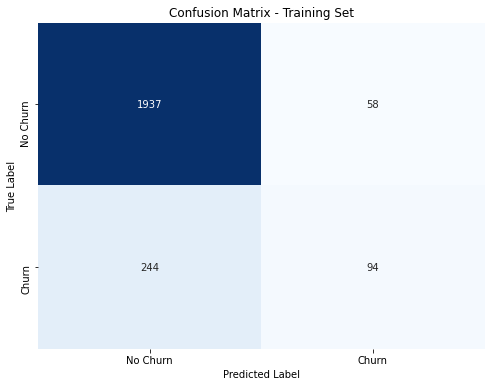

--- Testing Set Evaluation ---
Accuracy : 0.8760
Precision: 0.6721
Recall   : 0.2828
F1-Score : 0.3981
ROC-AUC  : 0.8129

Confusion Matrix:
[[835  20]
 [104  41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       855
           1       0.67      0.28      0.40       145

    accuracy                           0.88      1000
   macro avg       0.78      0.63      0.66      1000
weighted avg       0.86      0.88      0.85      1000



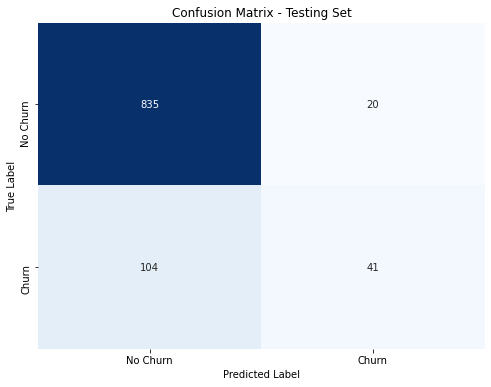

In [26]:
# Predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, y_proba, dataset_type="Test"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_proba)
    
    print(f"--- {dataset_type} Set Evaluation ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"ROC-AUC  : {roc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['No Churn', 'Churn'], 
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {dataset_type} Set')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Predictions and predicted probabilities
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
y_train_proba = pipeline.predict_proba(X_train)[:,1]
y_test_proba = pipeline.predict_proba(X_test)[:,1]

# Evaluate on Training Set
evaluate_model(y_train, y_train_pred, y_train_proba, "Training")

# Evaluate on Testing Set
evaluate_model(y_test, y_test_pred, y_test_proba, "Testing")

### Output analysis
**1.Training Set Evaluation**
 - Accuracy: 87.06%: The model correctly predicts 87.06% of the training instances.

 - Precision: 61.84%: Among the predicted churners, 61.84% are actual churners.

 - Recall: 27.81%: The model identifies 27.81% of actual churners.

 - F1-Score: 38.37%: The balance between precision and recall is low.

 - ROC-AUC: 84.79%: The model distinguishes well between churners and non-churners overall.

Confusion Matrix:

1937 True Negatives (TN), 58 False Positives (FP), 244 False Negatives (FN), 94 True Positives (TP)

The model is good at identifying non-churners but has poor recall for churners.

**2.Testing Set Evaluation**
 - Accuracy: 87.60%: The model correctly predicts 87.60% of the testing instances.

 - Precision: 67.21%: Among the predicted churners, 67.21% are actual churners.

 - Recall: 28.28%: The model identifies 28.28% of actual churners.

 - F1-Score: 39.81%: Slightly better than the training set, but still low.

 - ROC-AUC: 81.29%: The model distinguishes well between churners and non-churners overall.

Confusion Matrix:

835 True Negatives (TN), 20 False Positives (FP), 104 False Negatives (FN), 41 True Positives (TP)

Similar to the training set, the model performs well overall but struggles with low recall for churners, indicating it misses many actual churners.

### 5.2 Decision Tree Model
To improve on the baseline model predictions we'll use a Decision Tree model

In [27]:
# Reuse the preprocessing pipeline and add a Decision Tree classifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor from previous steps
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the Decision Tree model
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['account length',
                                                   'area code',
                                                   'total intl calls',
                                                   'customer service calls',
                                                   'total_minutes',
                                                   'total_calls',
                                                   'total_charges',
                                                   'intl_plan_usage',
                                                   'vmail_plan_usage',
                                                   'avg_call_duration']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['state', 'area code',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [28]:
# Predictions for training and testing sets
y_train_pred_dt = pipeline_dt.predict(X_train)
y_test_pred_dt = pipeline_dt.predict(X_test)
y_train_proba_dt = pipeline_dt.predict_proba(X_train)[:,1]
y_test_proba_dt = pipeline_dt.predict_proba(X_test)[:,1]

--- Training (Decision Tree) Set Evaluation ---
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000
ROC-AUC  : 1.0000

Confusion Matrix:
[[1995    0]
 [   0  338]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       1.00      1.00      1.00       338

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333



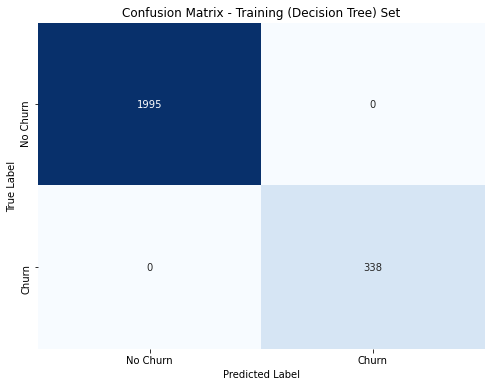

--- Testing (Decision Tree) Set Evaluation ---
Accuracy : 0.9390
Precision: 0.7727
Recall   : 0.8207
F1-Score : 0.7960
ROC-AUC  : 0.8899

Confusion Matrix:
[[820  35]
 [ 26 119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       855
           1       0.77      0.82      0.80       145

    accuracy                           0.94      1000
   macro avg       0.87      0.89      0.88      1000
weighted avg       0.94      0.94      0.94      1000



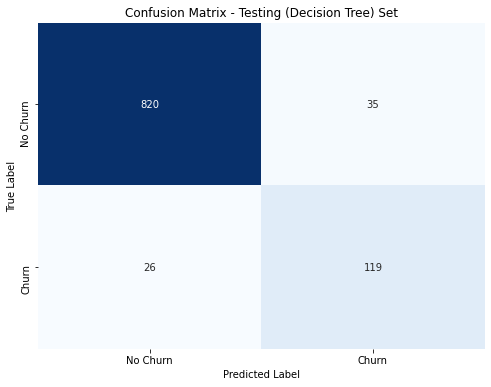

In [29]:
# Evaluation function as used before
def evaluate_model(y_true, y_pred, y_proba, dataset_type="Test"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_proba)
    
    print(f"--- {dataset_type} Set Evaluation ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"ROC-AUC  : {roc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['No Churn', 'Churn'], 
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {dataset_type} Set')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Evaluate on Training Set
evaluate_model(y_train, y_train_pred_dt, y_train_proba_dt, "Training (Decision Tree)")

# Evaluate on Testing Set
evaluate_model(y_test, y_test_pred_dt, y_test_proba_dt, "Testing (Decision Tree)")

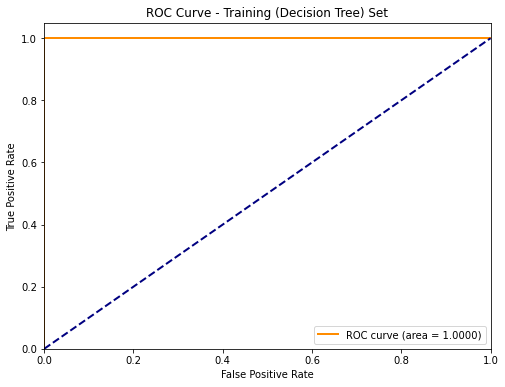

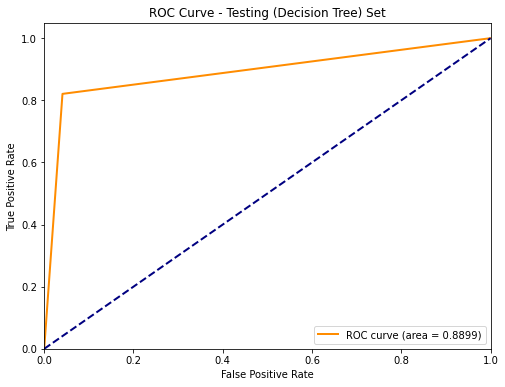

In [30]:
# Define a function to plot the ROC curve
def plot_roc_curve(y_true, y_proba, dataset_type="Test"):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_type} Set')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC Curve for Training Set
plot_roc_curve(y_train, y_train_proba_dt, "Training (Decision Tree)")

# Plot ROC Curve for Testing Set
plot_roc_curve(y_test, y_test_proba_dt, "Testing (Decision Tree)")

### Output Analysis
**1.Training Set Evaluation (Decision Tree)**

Accuracy, Precision, Recall, F1-Score, ROC-AUC: 1.0000
The model perfectly fits the training data, predicting every instance correctly.
Confusion Matrix: No errors, with all 1995 non-churners and 338 churners correctly identified.

The model is overfitting, capturing the training data perfectly, which is a sign of potential issues with generalization.

**2.Testing Set Evaluation (Decision Tree)**
 - Accuracy: 0.9390: The model correctly predicts 93.90% of the test instances.
 - Precision: 0.7727: Of the predicted churners, 77.27% were actual churners.
 - Recall: 0.8207: The model identifies 82.07% of actual churners, a significant improvement over the baseline.
 - F1-Score: 0.7960: Good balance between precision and recall.
 - ROC-AUC: 0.8899: Strong ability to distinguish between churners and non-churners.

Confusion Matrix:
820 True Negatives (TN), 35 False Positives (FP), 26 False Negatives (FN), 119 True Positives (TP)

**Conclusion:** The Decision Tree model performs very well on the testing set, with high recall and overall accuracy, but the perfect performance on the training set indicates overfitting. This suggests the model may benefit from hyperparameter tuning to improve generalization.

### 5.3 Decision Tree Model (with Hyperparameter Tuning)
Here I want to improve the Decision Tree model's ability to generalize by tuning its hyperparameters to reduce overfitting and enhance its predictive performance.

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10],         # Depth of the tree
    'classifier__min_samples_split': [2, 5, 10],    # Minimum samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]       # Minimum samples required to be at a leaf node
}

# Set up the pipeline with preprocessing and the Decision Tree classifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Reusing the preprocessing steps
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Set up GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline_dt, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Best hyperparameters found
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}


--- Training (Tuned Decision Tree) Set Evaluation ---
Accuracy : 0.9807
Precision: 1.0000
Recall   : 0.8669
F1-Score : 0.9287
ROC-AUC  : 0.9463

Confusion Matrix:
[[1995    0]
 [  45  293]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1995
           1       1.00      0.87      0.93       338

    accuracy                           0.98      2333
   macro avg       0.99      0.93      0.96      2333
weighted avg       0.98      0.98      0.98      2333



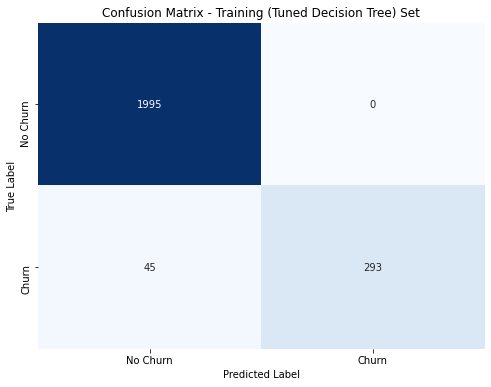

--- Testing (Tuned Decision Tree) Set Evaluation ---
Accuracy : 0.9680
Precision: 0.9913
Recall   : 0.7862
F1-Score : 0.8769
ROC-AUC  : 0.8846

Confusion Matrix:
[[854   1]
 [ 31 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       855
           1       0.99      0.79      0.88       145

    accuracy                           0.97      1000
   macro avg       0.98      0.89      0.93      1000
weighted avg       0.97      0.97      0.97      1000



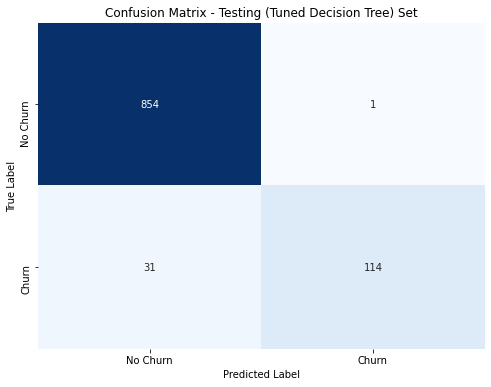

In [32]:
# Best model from GridSearch
best_model = grid_search.best_estimator_

# Predictions for training and testing sets
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)
y_train_proba_best = best_model.predict_proba(X_train)[:,1]
y_test_proba_best = best_model.predict_proba(X_test)[:,1]

# Evaluate the tuned model on Training Set
evaluate_model(y_train, y_train_pred_best, y_train_proba_best, "Training (Tuned Decision Tree)")

# Evaluate the tuned model on Testing Set
evaluate_model(y_test, y_test_pred_best, y_test_proba_best, "Testing (Tuned Decision Tree)")

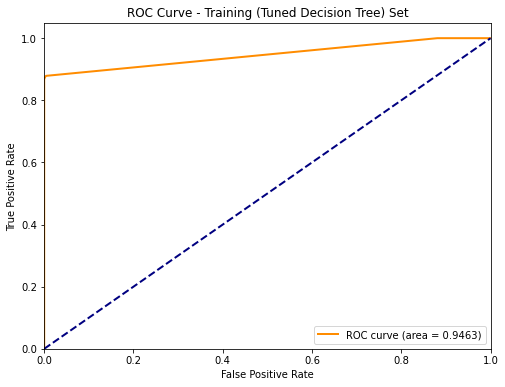

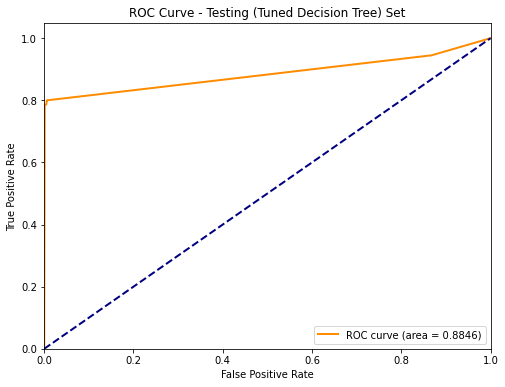

In [33]:
# Plot ROC Curve for Training Set
plot_roc_curve(y_train, y_train_proba_best, "Training (Tuned Decision Tree)")

# Plot ROC Curve for Testing Set
plot_roc_curve(y_test, y_test_proba_best, "Testing (Tuned Decision Tree)")

### Output analysis of the Tuned Decision Tree Model
**1.Training Set Evaluation**
 - Accuracy: 0.9807: The model correctly predicts 98.07% of the training instances, slightly lower than the overfitted initial model, which is a positive sign of reduced overfitting.
 - Precision: 1.0000: All predicted churners are actual churners. This perfect precision may indicate some remaining overfitting.
 - Recall: 0.8669: The model correctly identifies 86.69% of actual churners, which is an improvement over the initial model.
 - F1-Score: 0.9287: A strong balance between precision and recall.
 - ROC-AUC: 0.9463: The model has a strong ability to distinguish between churners and non-churners.

Confusion Matrix:

1995 True Negatives (TN), 0 False Positives (FP), 45 False Negatives (FN), 293 True Positives (TP)

The model still performs very well on the training set with some potential overfitting, as evidenced by the perfect precision and high accuracy.

**2.Testing Set Evaluation**
 - Accuracy: 0.9680: The model correctly predicts 96.80% of the test instances, an improvement over the initial model.
 - Precision: 0.9913: Nearly all predicted churners are actual churners, indicating high reliability in predictions.
 - Recall: 0.7862: The model identifies 78.62% of actual churners, which is a good but not perfect recall, showing the model misses some churners.
 - F1-Score: 0.8769: A good balance between precision and recall, better than the initial model.
 - ROC-AUC: 0.8846: The model maintains strong discrimination between classes on the test set.

Confusion Matrix:

854 True Negatives (TN), 1 False Positive (FP), 31 False Negatives (FN), 114 True Positives (TP)

The model generalizes well to the test data, with improved recall and F1-score compared to the initial model, although some overfitting may still be present given the perfect precision. Although the model could benefit from ***further reduce overfitting, improved recall, hyperparameters fine-tuning*** the tuned Decision Tree model shows significant improvement over the initial version, with better generalization and a good balance between precision and recall.

## 6. Evaluation

#### 6.1 Overall Comparison and Recommendation
**1.Baseline Model (Logistic Regression):**
 - Strengths: Simple and interpretable. However, it struggles with recall, meaning it may not be reliable in identifying churners.
 - Weaknesses: Misses many churners, which is critical for this problem.

**2.Decision Tree Model (No Tuning):**
 - Strengths: High recall and precision on the test set, capturing more churners than the baseline model.
 - Weaknesses: Severe overfitting, as indicated by perfect training performance, which may limit its reliability on new data.

**3.Tuned Decision Tree Model:**
 - Strengths: Balances precision and recall better than both the baseline and untuned Decision Tree. Shows reduced overfitting, indicating it will generalize better to new data.
 - Weaknesses: While recall is slightly lower than the untuned model, it is still strong and likely more reliable in real-world applications.

**Best Model for Predicting SyriaTel Customer Churn**
The Tuned Decision Tree Model is the best choice for predicting SyriaTel customer churn. It offers a strong balance between precision and recall, with significantly reduced overfitting compared to the untuned Decision Tree. This model is more likely to generalize well to unseen data, making it a reliable choice for identifying potential churners and enabling proactive customer retention strategies.

#### 6.2 Identified Key Churn Drivers
**1.Total Charges (e.g., Total Day, Evening, Night, and International Charges Combined)**

 - **Impact:** High charges can indicate that customers are being charged more than they expect or can afford, leading to dissatisfaction and a higher likelihood of churn.

**2.Customer Service Calls**

 - **Impact:** A high number of calls to customer service often signals unresolved issues or dissatisfaction, which can drive customers to leave.

**3.International Plan Usage**

 - **Impact:** Customers who use international services may be more price-sensitive or have specific needs that, if unmet, can lead to churn. How often they use the plan and the associated charges can influence their satisfaction.

**4.Voicemail Plan Usage**

 - **Impact:** Similar to international plan usage, customers with specific needs (e.g., voicemail) might churn if these needs aren't met satisfactorily or if they feel the cost isn't justified.

**5.Total Minutes Used**

 - **Impact:** The total minutes used, whether during the day, evening, or night, can reflect how engaged a customer is with the service. Very high or very low usage might indicate potential churn, depending on whether the customer feels they are getting value for money.

**6.Average Call Duration**

 - **Impact:** The length of calls might indicate the level of service interaction or satisfaction. Short calls might suggest poor engagement, while unusually long calls could indicate issues that aren't being resolved efficiently.

These features are typically identified as important in predicting churn because they directly relate to customer satisfaction, cost sensitivity, and service usage patterns. By addressing these areas, SyriaTel can target the factors most likely to lead to customer dissatisfaction and churn.

## Recommendations

**1. Implement Targeted Retention Strategies Using the Tuned Decision Tree Model**
 - Utilize the Tuned Decision Tree model to identify customers with a high likelihood of churning.

**2. Leverage Model Insights to Identify Key Churn Drivers**
 - Analyze the model’s feature importance to understand the primary factors contributing to customer churn.

**3. Continuous Monitoring and Model Refinement**
 - Establish a continuous feedback loop to monitor the effectiveness of the churn prediction model and refine it over time.